In [2]:
#Librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
folder = './datasets/'

In [5]:
repdaMor = pd.read_csv(folder+'RepdaMorelia.csv', parse_dates=['FECHA DE REGISTRO'], infer_datetime_format=True)

In [6]:
repdaMor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   TÍTULO                                                                      529 non-null    object        
 1   USO QUE AMPARA EL TÍTULO                                                    529 non-null    object        
 2   TITULAR                                                                     529 non-null    object        
 3   VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3  529 non-null    float64       
 4   APROVECHAMIENTOS SUPERFICIALES QUE AMPARA EL TÍTULO                         529 non-null    int64         
 5   VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUPERFICIALES EN m3         529 non-null    float64       

## Volúmenes de extracción de aguas nacionales

In [7]:
repdaMor['VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3'].describe()

count        529.00
mean      290858.85
std      2789856.18
min            0.00
25%            0.00
50%         6200.00
75%        54000.00
max     46372000.00
Name: VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3, dtype: float64

Con esto nos damos cuenta que en promedio se extraen 290,858.85 m³ de agua al año, sin embargo, al menos la mitad de los registros extraen menos de 6,200 m³ al año, incluso hay algunos que no extraen agua, los cuales debemos de revisar a profundidad. 

In [8]:
sinExtraccion = repdaMor[repdaMor['VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3']==0]

Revisemos los usos que se les dan a estos registros

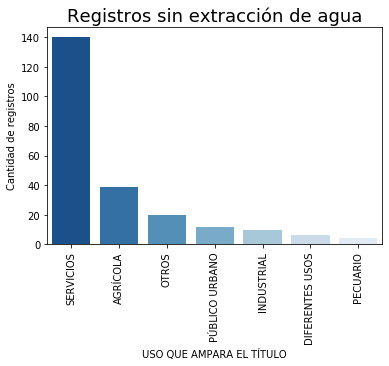

In [9]:
orden = sinExtraccion['USO QUE AMPARA EL TÍTULO'].value_counts().sort_values(ascending=False).index
sns.countplot(x='USO QUE AMPARA EL TÍTULO', data=sinExtraccion, palette='Blues_r', order = orden)
plt.title('Registros sin extracción de agua', fontsize=18)
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=90)
plt.show()

Vemos que la mayoría de los registros en los que **no** se extrae agua tienen como fin los servicios. También vemos que hay dos usos que no se entienden, "OTROS" y "DIFERENTES USOS", los cuales no tenemos forma de saber a qué se refieren.

Podemos ver los titulares que no extraen agua

In [10]:
for titular, registros in zip(sinExtraccion.TITULAR.value_counts().index,sinExtraccion.TITULAR.value_counts()):
    print(f"{titular} tiene {registros} registros donde no se presenta una extracción de agua nacional.\n")

ORGANISMO OPERADOR DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE MORELIA tiene 5 registros donde no se presenta una extracción de agua nacional.

NUEVA WAL-MART DE MEXICO, S. DE R.L. DE C.V. tiene 4 registros donde no se presenta una extracción de agua nacional.

UNION NACIONAL DE RESINEROS, A.C. tiene 2 registros donde no se presenta una extracción de agua nacional.

INMOBILIARIA Y CONSTRUCTORA SOLORZANO S.A. DE C.V. tiene 2 registros donde no se presenta una extracción de agua nacional.

JOSE ARMANDO, LILIANA DE LA SALUD Y FRANCISCO JOSE VILLAGOMEZ RIVADENEYRA tiene 2 registros donde no se presenta una extracción de agua nacional.

LA VOZ DE MICHOACAN, S.A. DE C.V. tiene 2 registros donde no se presenta una extracción de agua nacional.

ROSA RODRIGUEZ OCHOA tiene 2 registros donde no se presenta una extracción de agua nacional.

MARTHA IMELDA GONZALEZ HUERTA tiene 2 registros donde no se presenta una extracción de agua nacional.

ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y

De esta lista llama la atencia que el OOAPAS esté registrado de dos maneras diferentes, como _ORGANISMO OPERADOR DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE MORELIA_ y _ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y SANEAMIENTO DE MORELIA_, lo que nos indica una inconsistencia en los registros, por lo que debemos de arregrarlo.

In [11]:
repdaMor['TITULAR'].replace('ORGANISMO OPERADOR DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE MORELIA','ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y SANEAMIENTO DE MORELIA', inplace=True)
sinExtraccion['TITULAR'].replace('ORGANISMO OPERADOR DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE MORELIA','ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y SANEAMIENTO DE MORELIA', inplace=True)

/home/jazmin/.local/lib/python3.8/site-packages/pandas/core/series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Volvemos a revisar a los titulares que no extraen agua

In [12]:
for titular, registros in zip(sinExtraccion.TITULAR.value_counts().index,sinExtraccion.TITULAR.value_counts()):
    print(f"{titular} tiene {registros} registros donde no se presenta una extracción de agua nacional.\n")

ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y SANEAMIENTO DE MORELIA tiene 7 registros donde no se presenta una extracción de agua nacional.

NUEVA WAL-MART DE MEXICO, S. DE R.L. DE C.V. tiene 4 registros donde no se presenta una extracción de agua nacional.

UNION NACIONAL DE RESINEROS, A.C. tiene 2 registros donde no se presenta una extracción de agua nacional.

INMOBILIARIA Y CONSTRUCTORA SOLORZANO S.A. DE C.V. tiene 2 registros donde no se presenta una extracción de agua nacional.

JOSE ARMANDO, LILIANA DE LA SALUD Y FRANCISCO JOSE VILLAGOMEZ RIVADENEYRA tiene 2 registros donde no se presenta una extracción de agua nacional.

LA VOZ DE MICHOACAN, S.A. DE C.V. tiene 2 registros donde no se presenta una extracción de agua nacional.

ROSA RODRIGUEZ OCHOA tiene 2 registros donde no se presenta una extracción de agua nacional.

CRISOBA INDUSTRIAL, S.A. DE C.V. tiene 2 registros donde no se presenta una extracción de agua nacional.

FRIGORIFICO Y RASTRO DE MORELIA, S.A. DE C.V. tie

Finalmente, debemos destacar el hecho de que el 43.67% de los registros no extraen aguas nacionales.

Ahora podemos enfocarnos en los registros donde sí se extrae agua nacional

In [13]:
conExtraccion = repdaMor[~repdaMor.TÍTULO.isin(sinExtraccion.TÍTULO)]

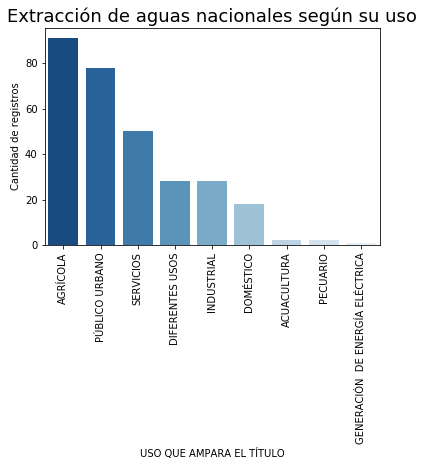

In [14]:
orden = conExtraccion['USO QUE AMPARA EL TÍTULO'].value_counts().sort_values(ascending=False).index
sns.countplot(x='USO QUE AMPARA EL TÍTULO', data=conExtraccion, palette='Blues_r', order = orden)
plt.title('Extracción de aguas nacionales según su uso', fontsize=18)
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=90)
plt.show()

Vemos que la mayoría son de uso agrícola, lo cual coincide con el hecho de que el 76% de las aguas en México se utilicen con fines agrícolas. Pero, gracias a la información que tenemos podemos ver qué tanta agua se extrae en realidad para este uso

In [18]:
sumExtUso = pd.pivot_table(data=conExtraccion, index = 'USO QUE AMPARA EL TÍTULO', values = 'VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3', aggfunc=np.sum).sort_values(by= 'VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3', ascending=False)

In [19]:
sumExtUso

,VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3
USO QUE AMPARA EL TÍTULO,
PÚBLICO URBANO,92063753.14
INDUSTRIAL,26098004.00
GENERACIÓN DE ENERGÍA ELÉCTRICA,17125000.00
AGRÍCOLA,13096837.28
SERVICIOS,2710206.77
DIFERENTES USOS,1995300.62
DOMÉSTICO,544262.65
ACUACULTURA,217598.40
PECUARIO,13371.26


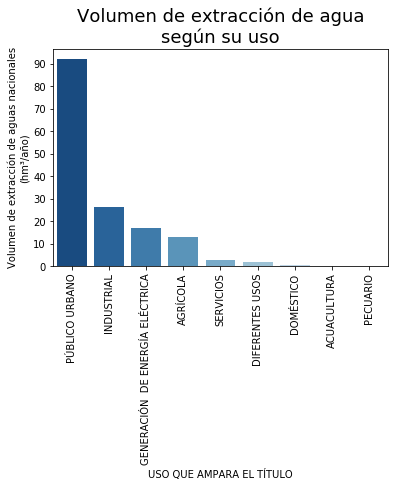

In [20]:
sns.barplot(x=sumExtUso.index,y='VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3', data=sumExtUso, palette='Blues_r')
plt.title('Volumen de extracción de agua\nsegún su uso', fontsize=18)
plt.ylabel('Volumen de extracción de aguas nacionales\n(hm³/año)')
plt.xticks(rotation=90)
plt.yticks(ticks=[int(i) for i in range(0,int(100e6),int(10e6))],labels=[int(i/1e6) for i in range(0,int(100e6),int(10e6))])
plt.show()

Vemos que a pesar de ser el uso más común, el uso agrícola es el cuarto que más extrae agua, siendo el primero el público urbano, seguido del Industrial. Otra cosa que llama mucho la atención es el uso de generación d eenergía elpectrica, pues es el menos común, pero es el tercero que más extrae agua.

## Usos

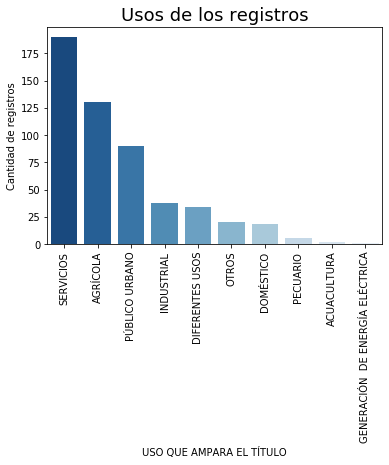

In [22]:
#Distribución
orden = repdaMor['USO QUE AMPARA EL TÍTULO'].value_counts().sort_values(ascending=False).index
sns.countplot(x='USO QUE AMPARA EL TÍTULO', data=repdaMor, palette='Blues_r', order = orden)
plt.title('Usos de los registros', fontsize=18)
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=90)
plt.show()

Vemos que la mayoría de los registros tienen como fin el uso de Servicios.

In [23]:
usosTitular = pd.pivot_table(data=repdaMor, columns='USO QUE AMPARA EL TÍTULO', values='VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3',index='TITULAR', aggfunc='count')
usosTitular.fillna(0,inplace=True)

In [24]:
for col in usosTitular.columns:
    print("#"*20,col,"#"*20)
    print(usosTitular.sort_values(by=col, ascending=False)[col].head(5))

#################### ACUACULTURA ####################
TITULAR
JORGE ARMANDO JIMENEZ DE LA TORRE     1.00
ESVEYDE MARTINEZ BASURTO              1.00
AAK MEXICO, S. A. DE C. V.            0.00
MARCELA GUADALUPE SANCHEZ HERNANDEZ   0.00
MA. TERESA RUIZ MARTINEZ              0.00
Name: ACUACULTURA, dtype: float64
#################### AGRÍCOLA ####################
TITULAR
JOSE ALFREDO GODINEZ MALFAVON                                               2.00
UNIVERSIDAD AUTONOMA CHAPINGO                                               2.00
ROMULO AMARO GONZALEZ, HELIODORO AMARO GONZALEZ                             2.00
MARTHA IMELDA GONZALEZ HUERTA                                               2.00
JOSE ARMANDO, LILIANA DE LA SALUD Y FRANCISCO JOSE VILLAGOMEZ RIVADENEYRA   2.00
Name: AGRÍCOLA, dtype: float64
#################### DIFERENTES USOS ####################
TITULAR
EJIDO COINTZIO                         2.00
VICTOR MANUEL VILLICAÑA MALDONADO      2.00
CARLOS ALEJANDRO VILLICAÑA MALDONADO   2

In [25]:
sumSupUso = pd.pivot_table(data=repdaMor, index = 'USO QUE AMPARA EL TÍTULO', values = 'SUPERFICIE EN m2', aggfunc=np.sum).sort_values(by='SUPERFICIE EN m2', ascending=False)

In [26]:
sumSupUso

,SUPERFICIE EN m2
USO QUE AMPARA EL TÍTULO,
SERVICIOS,314293.80
AGRÍCOLA,191730.25
PECUARIO,42935.00
OTROS,9510.00
DIFERENTES USOS,448.72
INDUSTRIAL,20.00
ACUACULTURA,0.00
DOMÉSTICO,0.00
GENERACIÓN DE ENERGÍA ELÉCTRICA,0.00


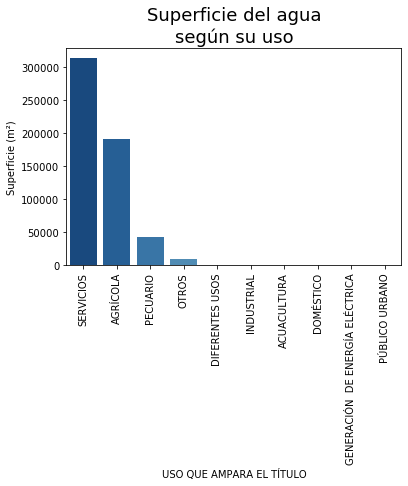

In [27]:
sns.barplot(x=sumSupUso.index,y='SUPERFICIE EN m2', data=sumSupUso, palette='Blues_r')
plt.title('Superficie del agua\nsegún su uso', fontsize=18)
plt.ylabel('Superficie (m²)')
plt.xticks(rotation=90)
plt.show()

In [28]:
repdaMor.columns

Index(['TÍTULO', 'USO QUE AMPARA EL TÍTULO', 'TITULAR',
       'VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3',
       'APROVECHAMIENTOS SUPERFICIALES QUE AMPARA EL TÍTULO',
       'VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUPERFICIALES EN m3',
       'APROVECHAMIENTOS SUBTERRÁNEOS QUE AMPARA EL TÍTULO',
       'VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUBTERRÁNEOS EN m3',
       'PUNTOS DE DESCARGA QUE AMPARA EL TÍTULO',
       'VOLUMEN DE DESCARGA DIARIO EN m3',
       'ZONAS FEDERALES QUE AMPARA EL TITULO', 'SUPERFICIE EN m2',
       'FECHA DE REGISTRO', 'AUTORIDAD QUE EMITE EL ACTO'],
      dtype='object')

In [29]:
#Anexos
repdaMor['TOTAL DE ANEXOS'] = repdaMor['APROVECHAMIENTOS SUPERFICIALES QUE AMPARA EL TÍTULO']+repdaMor['APROVECHAMIENTOS SUBTERRÁNEOS QUE AMPARA EL TÍTULO']+repdaMor['PUNTOS DE DESCARGA QUE AMPARA EL TÍTULO']+repdaMor['ZONAS FEDERALES QUE AMPARA EL TITULO']

In [30]:
usosAnexos =  pd.pivot_table(data=repdaMor, index='USO QUE AMPARA EL TÍTULO', values='TOTAL DE ANEXOS', aggfunc='sum').sort_values('TOTAL DE ANEXOS', ascending=False)
usosAnexos

,TOTAL DE ANEXOS
USO QUE AMPARA EL TÍTULO,
SERVICIOS,267
PÚBLICO URBANO,152
AGRÍCOLA,145
DIFERENTES USOS,57
INDUSTRIAL,45
OTROS,22
DOMÉSTICO,18
PECUARIO,8
ACUACULTURA,3


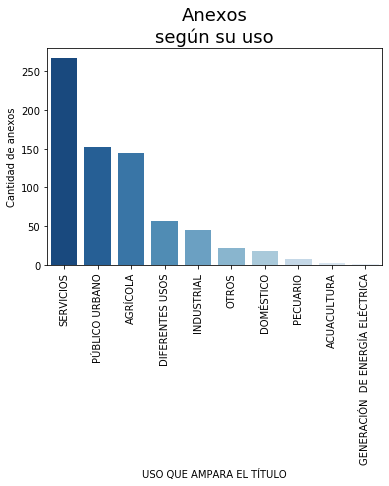

In [31]:
sns.barplot(x=usosAnexos.index,y='TOTAL DE ANEXOS', data=usosAnexos, palette='Blues_r')
plt.title('Anexos\nsegún su uso', fontsize=18)
plt.ylabel('Cantidad de anexos')
plt.xticks(rotation=90)
plt.show()

## Titulares

In [32]:
#Con más de un registro
titgt2 = repdaMor.TITULAR.value_counts()[:36].index

Usos

In [33]:
titularUsos = pd.pivot_table(data=repdaMor[repdaMor.TITULAR.isin(titgt2)], columns='USO QUE AMPARA EL TÍTULO', values='VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3',index='TITULAR', aggfunc='count')
titularUsos.fillna(0,inplace=True)
titularUsos['TOTAL'] = sum([usosTitular[col] for col in usosTitular.columns])
titularUsos.sort_values(by='TOTAL', ascending=False,inplace=True)

In [34]:
titularUsos

USO QUE AMPARA EL TÍTULO,ACUACULTURA,AGRÍCOLA,DIFERENTES USOS,INDUSTRIAL,OTROS,PECUARIO,PÚBLICO URBANO,SERVICIOS,TOTAL
TITULAR,,,,,,,,,
ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y SANEAMIENTO DE MORELIA,0.00,0.00,0.00,0.00,0.00,0.00,45.00,5.00,50.00
"NUEVA WAL-MART DE MEXICO, S. DE R.L. DE C.V.",0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00
"BEBIDAS AZTECA DEL CENTRO, S.A. DE C.V.",0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,3.00
"LA VOZ DE MICHOACAN, S.A. DE C.V.",0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00
"RESIDENCIAL TORREON NUEVO, S. A. DE C. V.",0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00
INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00
"ROMULO AMARO GONZALEZ, HELIODORO AMARO GONZALEZ",0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
"PAROM, S.A. DE C.V.",0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00
"RESINAS SINTETICAS, S.A. DE C.V.",0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00


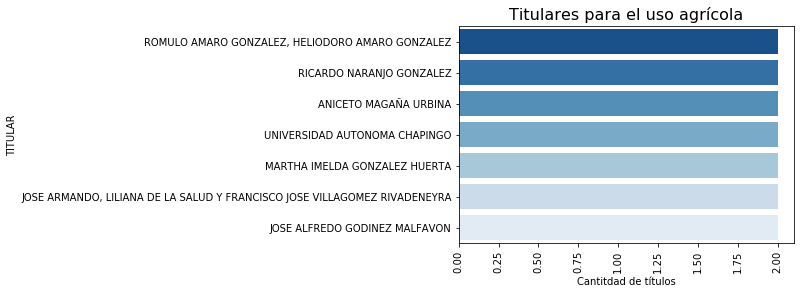

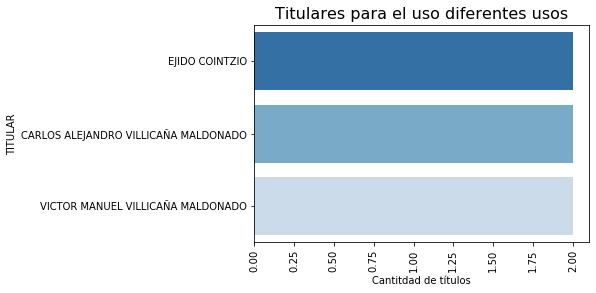

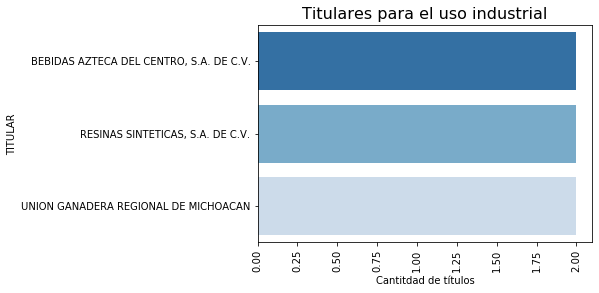

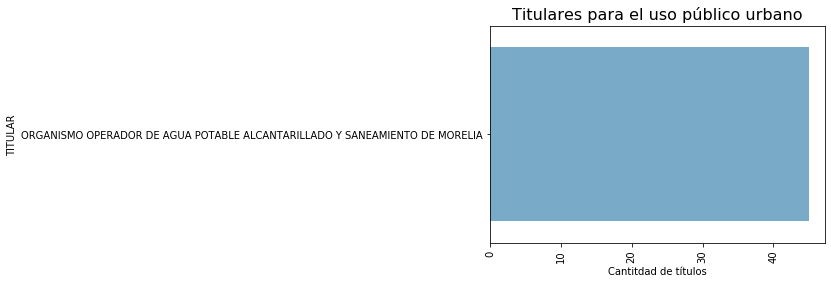

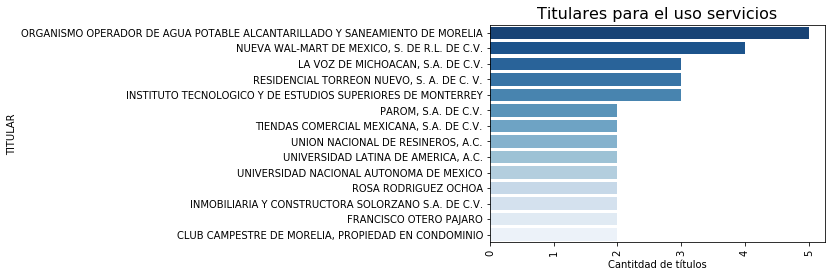

In [35]:
for col in titularUsos.columns[:-1]:
    temp = titularUsos[titularUsos[col]>1].sort_values(by=col, ascending=False)
    if temp.shape[0]==0:
        continue
    sns.barplot(y=temp.index,x=temp[col], palette='Blues_r')
    plt.title("Titulares para el uso "+col.lower(),fontsize=16)
    plt.xlabel("Cantitdad de títulos")
    plt.xticks(rotation=90)
    plt.show()

Totales

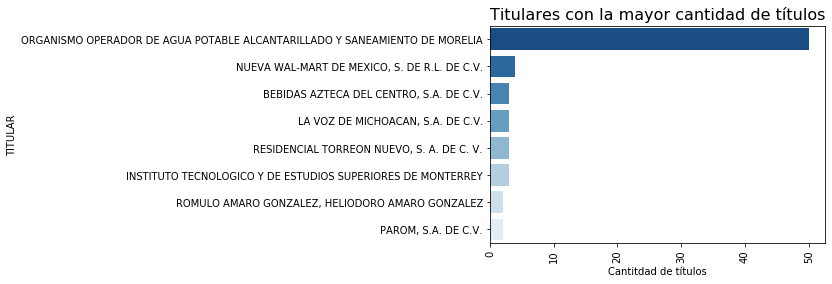

In [36]:
sns.barplot(y=titularUsos.head(8).index,x=titularUsos.head(8)['TOTAL'], palette='Blues_r')
plt.title("Titulares con la mayor cantidad de títulos",fontsize=16)
plt.xlabel("Cantitdad de títulos")
plt.xticks(rotation=90)
plt.show()

Extracción de agua

In [37]:
titularesExtra = pd.pivot_table(data=repdaMor, index = 'TITULAR', values = 'VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3', aggfunc='sum')
titularesExtra.sort_values(by='VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3', ascending=False, inplace=True)

In [38]:
titularesExtra

,VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3
TITULAR,
ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y SANEAMIENTO DE MORELIA,87102219.98
CRISOBA INDUSTRIAL S.A. DE C.V.,22075200.00
COMISION FEDERAL DE ELECTRICIDAD,17125000.00
"POBLADO ""SAN ANTONIO PARANGARE""",2488320.00
EJIDO SANTIAGO UNDAMEO,1531392.00
...,...
INSTITUTO TECNOLOGICO DE MORELIA,0.00
"INTEGRA MM, S. A. DE C. V.",0.00
ISAIAS ARROYO GALLEGOS,0.00


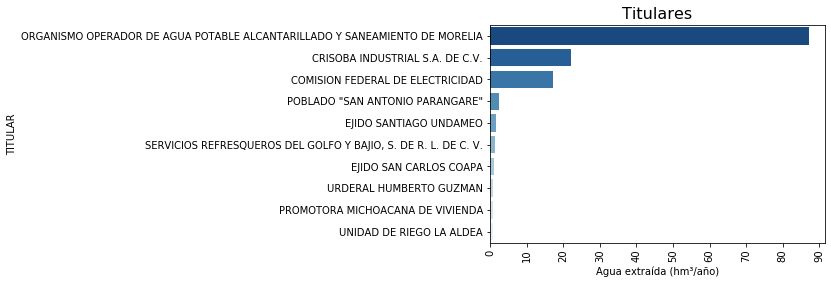

In [39]:
sns.barplot(y=titularesExtra.head(10).index,x=titularesExtra.head(10)['VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3'], palette='Blues_r')
plt.title("Titulares",fontsize=16)
plt.xlabel("Agua extraída (hm³/año)")
plt.xticks(ticks=[int(i) for i in range(0,int(100e6),int(10e6))],labels=[int(i/1e6) for i in range(0,int(100e6),int(10e6))],rotation=90)
plt.show()

Anexos

In [40]:
titularesAnexo = pd.pivot_table(data=repdaMor, index = 'TITULAR', values = 'TOTAL DE ANEXOS', aggfunc='sum')
titularesAnexo.sort_values(by='TOTAL DE ANEXOS', ascending=False, inplace=True)

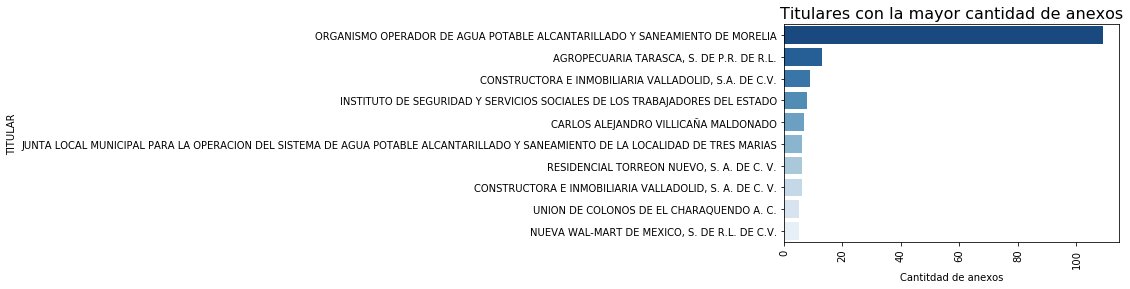

In [41]:
sns.barplot(y=titularesAnexo.head(10).index,x=titularesAnexo.head(10)['TOTAL DE ANEXOS'], palette='Blues_r')
plt.title("Titulares con la mayor cantidad de anexos",fontsize=16)
plt.xlabel("Cantitdad de anexos")
plt.xticks(rotation=90)
plt.show()

Superficie

In [43]:
titularesSuper = pd.pivot_table(data=repdaMor, index = 'TITULAR', values = 'SUPERFICIE EN m2', aggfunc='sum')
titularesSuper.sort_values(by='SUPERFICIE EN m2', ascending=False, inplace=True)

In [44]:
titularesSuper

,SUPERFICIE EN m2
TITULAR,
MIGUEL ALVARADO VILLA,40520.00
CELIN CORTES GALLEGOS,36312.50
"PAROM, S.A. DE C.V.",36100.00
ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILLADO Y SANEAMIENTO DE MORELIA,33367.00
"INTEGRA MM, S. A. DE C. V.",33000.00
...,...
FRANCISCO AGUILAR CHAVEZ,0.00
"FONDO DE GARANTIA Y FOMENTO PARA LA AGRICULTURA, GANADERIA Y AVICULTURA",0.00
FONDO DE GARANTIA Y FOMENTO PARA LA AGRICULTURA GANADERIA Y AVICULTURA,0.00


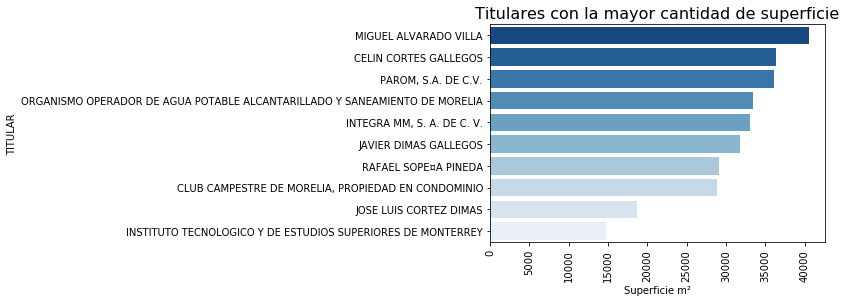

In [45]:
sns.barplot(y=titularesSuper.head(10).index,x=titularesSuper.head(10)['SUPERFICIE EN m2'], palette='Blues_r')
plt.title("Titulares con la mayor cantidad de superficie",fontsize=16)
plt.xlabel("Superficie m²")
plt.xticks(rotation=90)
plt.show()

## Fechas

In [47]:
repdaMor[repdaMor.TÍTULO.apply(lambda x: len(x))==20]['FECHA DE REGISTRO'].describe(datetime_is_numeric=True)

count                              368
mean     2008-01-04 07:57:23.478260992
min                1994-10-17 00:00:00
25%                2000-11-21 06:00:00
50%                2008-04-18 00:00:00
75%                2015-10-01 00:00:00
max                2019-01-21 00:00:00
Name: FECHA DE REGISTRO, dtype: object

In [48]:
repdaMor[repdaMor.TÍTULO.apply(lambda x: x.isdigit())]['FECHA DE REGISTRO'].describe(datetime_is_numeric=True)

count                               35
mean     2021-01-22 18:30:51.428571392
min                2020-01-31 00:00:00
25%                2020-08-29 12:00:00
50%                2021-01-15 00:00:00
75%                2021-07-31 12:00:00
max                2021-12-16 00:00:00
Name: FECHA DE REGISTRO, dtype: object

In [49]:
repdaMor['FECHA DE REGISTRO'].describe(datetime_is_numeric=True)

count                              529
mean     2006-09-19 12:14:58.298676736
min                1994-05-13 00:00:00
25%                1998-04-08 00:00:00
50%                2004-09-22 00:00:00
75%                2015-10-22 00:00:00
max                2021-12-16 00:00:00
Name: FECHA DE REGISTRO, dtype: object

In [50]:
repdaMor[pd.DatetimeIndex(repdaMor['FECHA DE REGISTRO']).year==2019]

,TÍTULO,USO QUE AMPARA EL TÍTULO,TITULAR,VOLUMEN DE EXTRACCIÓN ANUAL DE AGUAS NACIONALES QUE AMPARA EL TÍTULO EN m3,APROVECHAMIENTOS SUPERFICIALES QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUPERFICIALES EN m3,APROVECHAMIENTOS SUBTERRÁNEOS QUE AMPARA EL TÍTULO,VOLUMEN DE EXTRACCIÓN ANUAL DE APROVECHAMIENTOS SUBTERRÁNEOS EN m3,PUNTOS DE DESCARGA QUE AMPARA EL TÍTULO,VOLUMEN DE DESCARGA DIARIO EN m3,ZONAS FEDERALES QUE AMPARA EL TITULO,SUPERFICIE EN m2,FECHA DE REGISTRO,AUTORIDAD QUE EMITE EL ACTO,TOTAL DE ANEXOS
65,08MCH161086,AGRÍCOLA,JOSE ARMANDO FERREIRA HERNANDEZ,0.00,0,0.00,0,0.00,0,0.00,1,1357.12,2019-01-14,DIRECCIÓN LOCAL MICHOACÁN,1
336,04MCH161180/18APDL18,AGRÍCOLA,"DAVID EDUARDO MARTINEZ PULIDO, Y ROGELIO ULISE...",10368.00,0,0.00,1,10368.00,0,0.00,0,0.00,2019-01-21,DIRECCIÓN LOCAL MICHOACÁN,1
387,08MCH160792/12HMDL18,PÚBLICO URBANO,ORGANISMO OPERADOR DE AGUA POTABLE ALCANTARILL...,373248.00,0,0.00,1,373248.00,0,0.00,0,0.00,2019-01-02,DIRECCIÓN LOCAL MICHOACÁN,1
388,08MCH161507/12AMDL19,AGRÍCOLA,UNIVERSIDAD AUTONOMA CHAPINGO,30000.00,0,0.00,1,30000.00,0,0.00,0,0.00,2019-01-02,DIRECCIÓN LOCAL MICHOACÁN,1
411,08MCH160673/12EMDL18,SERVICIOS,"RESIDENCIAL BOSQUE MONARCA, S.A. DE C.V.",0.00,0,0.00,0,0.00,1,87.70,0,0.00,2019-01-21,DIRECCIÓN LOCAL MICHOACÁN,1
438,08MCH161089/12EDDL18,SERVICIOS,"INMOBILIARIA CITELIS, S.A. DE C.V.",0.00,0,0.00,0,0.00,0,0.00,2,5438.35,2019-01-21,DIRECCIÓN LOCAL MICHOACÁN,2
439,08MCH161259/12ACDL18,AGRÍCOLA,NORBERTO VASQUEZ HEREDIA,0.00,0,0.00,0,0.00,0,0.00,1,875.27,2019-01-21,DIRECCIÓN LOCAL MICHOACÁN,1


In [51]:
repdaMor['AUTORIDAD QUE EMITE EL ACTO'].value_counts()

DIRECCIÓN LOCAL MICHOACÁN                                            520
DIRECCIÓN GENERAL DEL ORGANISMO DE CUENCA LERMA SANTIAGO PACÍFICO      6
SUBDIRECCIÓN GENERAL DE ADMINISTRACIÓN DEL AGUA                        2
SUBDIRECTOR GENERAL DE ADMINISTRACIÓN DEL AGUA                         1
Name: Autoridad que emite el acto, dtype: int64

In [51]:
sinExtraccion['FECHA DE REGISTRO'].describe(datetime_is_numeric=True)

count                              231
mean     2005-09-20 07:16:21.818181760
min                1994-07-07 00:00:00
25%                1998-04-08 00:00:00
50%                2004-08-03 00:00:00
75%                2012-09-14 00:00:00
max                2021-07-09 00:00:00
Name: FECHA DE REGISTRO, dtype: object